<h1 align= 'center'>Sonification from Image</h1>

<h5 align = 'center'>K M Shariat Ullah <br> Student, Electrical and Electronic Engineering, Shahjalal University of Science and Technology <br> E-mail: cast.shariat@gmail.com</h5>

Sonification is the process of converting non-speech materials into audio to hear the informations in them. Like each pixel of an image can be converted to audio as per their pixel value. In this notebook, I share my framework to convert any grayscale image to audio.

#### Packages

In [1]:
from PIL import Image
import numpy as np
from scipy.io.wavfile import write
from IPython.display import Audio, display
import matplotlib.pyplot as plt

#### Loading the Image

In [2]:
def load_image(image_path):
    img = Image.open(image_path).convert("L")   # grayscale
    img = img.resize((128, 128))                # resize
    return np.array(img)

#### Pixel to Frequency Domain

In [3]:
def pixel_to_frequency(pixels):
    max_freq = 2000             # max freq
    min_freq = 200              # min freq
    normalized = pixels / 255   # normalization
    return normalized * (max_freq - min_freq) + min_freq

#### Sampling

In [4]:
def generate_wave(frequency, duration=0.1, sample_rate=44100):
    t = np.linspace(0, duration, int(sample_rate * duration), endpoint=False)
    wave = 0.5 * np.sin(2 * np.pi * frequency * t)  #initial audio
    return wave

#### Image to Audio Conversion

In [5]:
def sonify_image(image_array, sample_rate=44100):
    frequencies = pixel_to_frequency(image_array)
    audio = []
    for row in frequencies:
        row_wave = np.hstack([generate_wave(freq, sample_rate=sample_rate) for freq in row])
        audio.append(row_wave)
    return np.hstack(audio)

#### Digitization and Saving

In [6]:
def save_audio(audio, filename="test_output.wav", sample_rate=44100):
    audio = np.int16(audio / np.max(np.abs(audio)) * 32767)  # Normalize to 16-bit
    write(filename, sample_rate, audio)

In [7]:
def play_audio_button(audio_data, sample_rate=44100):
    """
    Display a play button to play the audio.

    Parameters:
    - audio_data: The audio data as a numpy array.
    - sample_rate: The sample rate of the audio (default 44100 Hz).
    """
    display(Audio(audio_data, rate=sample_rate))

#### Testing

In [8]:
image_path = "images/test_1.png"
image_array = load_image(image_path)
audio_data = sonify_image(image_array)
save_audio(audio_data)
print("Sonification saved as test_output.wav")

Sonification saved as test_output.wav


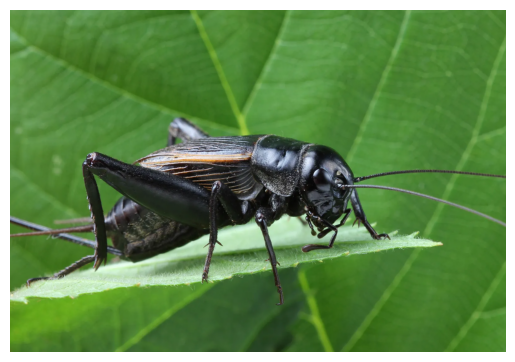

In [9]:
image = Image.open(image_path)
plt.imshow(image)
plt.axis('off')  
plt.show()

In [ ]:
display(Audio(audio_data, rate=44100))